In [77]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

from scipy.io import arff

import matplotlib as mpl
import matplotlib.pyplot as plt

from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.features.pca import PCADecomposition

from sklearn import decomposition
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn import tree
from sklearn import random_projection
from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble import ExtraTreesClassifier

from scipy import stats
from sklearn.feature_selection import SelectFromModel
import seaborn as sns
from sklearn import cluster
from  sklearn.preprocessing import OneHotEncoder

import timeit

random_state = 69

In [158]:
#     Unsupervised learning
#     k-means clustering
#     Expectation Maximization

file = "income_data_final.csv"
df = pd.read_csv(file)
df = df.sample(frac=1).reset_index(drop=True)

#df = pd.DataFrame(data[0])
features = ['age', 'workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'education-num']

x_features = df[features]

onehotencoder = OneHotEncoder(categorical_features = [1,3,4,5,6,7,8,9])
x_features = onehotencoder.fit_transform(x_features).toarray()

y_predict = df.y_predict

#.1024
#x_g,x_hypertune, y_g, y_hypertune  = train_test_split(x_features, y_predict, test_size=0.1024, random_state=143)
x_train, x_test, y_train, y_test = train_test_split(x_features, y_predict, test_size=0.3, random_state=143)
x_g,x_hypertune, y_g, y_hypertune = train_test_split(x_train, y_train, test_size=0.2, random_state=122)

# x_train1_standard = (x_train1-np.mean(x_train1))/np.std(x_train1)
# x_val1_standard = (x_val1-np.mean(x_train1))/np.std(x_train1)
# x_test_standard = (x_test-np.mean(x_train1))/np.std(x_train1)


x_train, x_test, y_train, y_test = train_test_split(x_features, y_predict, test_size=0.3, random_state=40)

x_train = pd.DataFrame.from_records(x_train)
#y_train = pd.DataFrame.from_records(y_train)

x_test = pd.DataFrame.from_records(x_test)
#y_test = pd.DataFrame.from_records(y_test)

x_hypertune = pd.DataFrame.from_records(x_hypertune)
#y_train = pd.DataFrame.from_records(y_train)

x_hypertune = pd.DataFrame.from_records(x_hypertune)
#y_test = pd.DataFrame.from_records(y_test)

num_of_comp = 100#len(x_test.columns)

x_train_list = np.array(x_train.values.tolist())
y_train_list = np.array(y_train.values.tolist())

x_test_list = np.array(x_test.values.tolist())
y_test_list = np.array(y_test.values.tolist())


def get_eigen_value(pca, X):
    
    # We center the data and compute the sample covariance matrix.
    X_centered = X - np.mean(X, axis=0)
    cov_matrix = np.dot(X_centered.T, X_centered) / len(X)
    eigenvalues = pca.explained_variance_
    for eigenvalue, eigenvector in zip(eigenvalues, pca.components_):    
        print(np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))
        print(eigenvalue)

def bench_k_means(x, y, estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(y, estimator.labels_),
             metrics.completeness_score(y, estimator.labels_),
             metrics.v_measure_score(y, estimator.labels_),
             metrics.adjusted_rand_score(y, estimator.labels_),
             metrics.adjusted_mutual_info_score(y,  estimator.labels_,
                                                average_method='arithmetic'),
             metrics.silhouette_score(x, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=len(x))))

def feature_corr(x):
    correlations = x.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [159]:
print(y_train)
len(x_test.columns)

print(x_train.shape)

regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
reg_y_pred = regr.predict(x_test)
print(n)
print('Variance score: %.2f' % r2_score(y_test, reg_y_pred))

def model_test(x_train, x_test):
    regr = linear_model.LinearRegression()
    # Train the model using the training sets
    regr.fit(x_train, y_train)

    # Make predictions using the testing set
    reg_y_pred = regr.predict(x_test)
    print(n)
    print('Variance score: %.2f' % f1_score(y_test, reg_y_pred))


35574    0
22261    0
16944    0
34290    0
3795     0
        ..
27640    0
14501    0
30727    0
47323    0
11590    0
Name: y_predict, Length: 34189, dtype: int64
(34189, 358)
99
Variance score: -3805813710611.79


__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++ 2	9.70s	2413669	0.043	0.035	0.038	0.066	0.038	0.531
k-means++ 3	8.99s	1365675	0.079	0.041	0.054	0.054	0.054	0.467
k-means++ 4	10.00s	956918	0.099	0.041	0.058	0.041	0.058	0.418
k-means++ 5	12.92s	765528	0.108	0.039	0.057	0.034	0.057	0.377
k-means++ 6	15.26s	649725	0.110	0.036	0.054	0.027	0.054	0.344
k-means++ 7	15.93s	576933	0.113	0.034	0.052	0.021	0.052	0.314
k-means++ 8	17.78s	529600	0.116	0.032	0.050	0.019	0.050	0.281
k-means++ 9	20.29s	495869	0.118	0.031	0.049	0.014	0.049	0.255
__________________________________________________________________________________


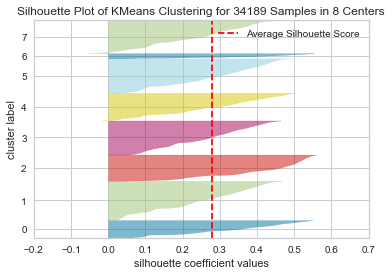

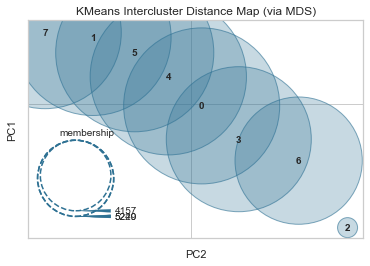

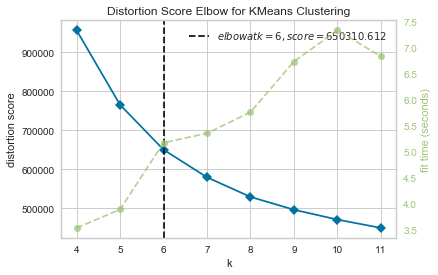

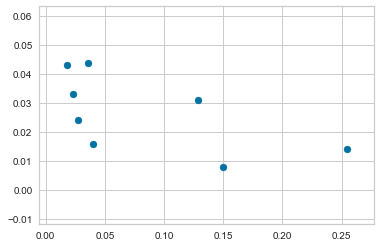

In [143]:
#     k-means clustering
def run_kmeans(n_clusters, x, y):
    sample_size = len(y)

    print(82 * '_')
    print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
    for n in range(2,10):
        bench_k_means(x, y, KMeans(init='k-means++', n_clusters=n, n_init=30, random_state=random_state),
                      name="k-means++ " + str(n), data=x)

    print(82 * '_')
    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each




    kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(x)        # Fit the data to the visualizer
    visualizer.show() 

    kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
    visualizer = InterclusterDistance(kmeans)
    visualizer.fit(x)        # Fit the data to the visualizer
    visualizer.show()        # Finalize and render the figure


    kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
    visualizer = KElbowVisualizer(kmeans, k=(4,12))
    visualizer.fit(x)        # Fit the data to the visualizer
    visualizer.show()        # Finalize and render the figure

    kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
    kmeans.fit(x_train)
    #Z = kmeans.predict(np.c_[x_train, y_train])
    X = kmeans.cluster_centers_
    plt.scatter(X[:,0],X[:,1], label='True Position')

run_kmeans(8, x_train, y_train)


number of components:  9
aic -60196351.83344428
bic -59626750.79208999
******************************************************************************************
number of components:  10
aic -60455572.28319615
bic -59882941.40417689
******************************************************************************************
number of components:  11
aic -60385291.21527111
bic -59809630.498586886
******************************************************************************************
number of components:  12
aic -60506217.025829166
bic -59927526.471479975
******************************************************************************************
number of components:  13
aic -60394467.52243402
bic -59812747.130419865
******************************************************************************************
spherical
lower bound,  -208.52895938546845
converged,  True

diag
lower bound,  1261.7412843149468
converged,  True

tied
lower bound,  874.8688315068362
converged,  True

full
lowe

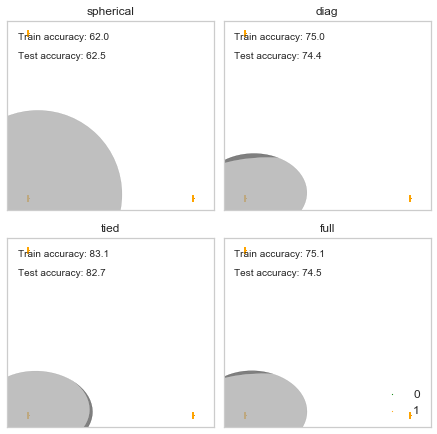

In [178]:
###Expectation Maximization###
def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')
        
n_classes = len(np.unique(y_train))
colors = ['0', '1']
a_color = ['green', 'orange']



def run_em(x, y, xtest, ytest):
    # Try GMMs using different types of covariances.
    estimators = {cov_type: GaussianMixture(n_components=n_classes,
                  covariance_type=cov_type, max_iter=200, random_state=random_state)
                  for cov_type in ['spherical', 'diag', 'tied', 'full']}

    n_estimators = len(estimators)

    plt.figure(figsize=(3 * n_estimators // 2, 6))
    plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                        left=.01, right=.99)

    x_train_list = np.array(x.values.tolist())
    y_train_list = np.array(y.values.tolist())
    # count = 0
    # for i in y_train_list:
    #     if(i == 0.0):
    #         count = count + 1
    # print("count", count)
    # print("size", len(y_train_list))
    for n in range(9, 14):
        gm = GaussianMixture(n_components=n,
                  covariance_type='tied', max_iter=200, random_state=random_state, warm_start=True)
        gm.fit(x)
        print("number of components: ", n)
        print("aic", gm.aic(x))
        print("bic", gm.bic(x))
        print('*'*90)



    for index, (name, estimator) in enumerate(estimators.items()):
        # Since we have class labels for the training data, we can
        # initialize the GMM parameters in a supervised manner.
        estimator.means_init = np.array([x[y_train_list == i].mean(axis=0)
                                        for i in range(n_classes)])

        # Train the other parameters using the EM algorithm.
        estimator.fit(x)

        h = plt.subplot(2, n_estimators // 2, index + 1)
        make_ellipses(estimator, h)

        for n, color in enumerate(colors):
            data = x_train_list[y_train_list == n]

            plt.scatter(data[:, 0], data[:, 1], s=0.8, color=a_color[int(float(color))],
                        label=colors[n])
        # Plot the test data with crosses
        for n, color in enumerate(colors):
            data = x_train_list[y_train_list == n]
            plt.scatter(data[:, 0], data[:, 1], marker='|', color=a_color[int(float(color))])

        y_train_pred = estimator.predict(x)
        train_accuracy = np.mean(y_train_pred.ravel() == y.ravel()) * 100
        plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
                 transform=h.transAxes)

        y_test_pred = estimator.predict(xtest)
        test_accuracy = np.mean(y_test_pred.ravel() == ytest.ravel()) * 100
        plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
                 transform=h.transAxes)

        plt.xticks(())
        plt.yticks(())
        plt.title(name)
        print(name)
        print("lower bound, ", estimator.lower_bound_)
        print("converged, ", estimator.converged_)
        print()

    plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


    plt.show()

run_em(x_train, y_train, x_test, y_test)

In [ ]:

#     PCA
#     ICA
#     Randomized Projections
#     Any other feature selection algorithm you desire


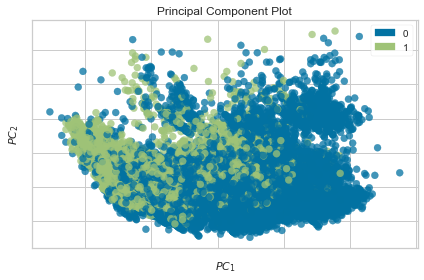

[[ 37.31094586   0.30991767  -0.77092387]
 [ 11.32299292  -3.86023239   0.27791553]
 [-12.72646014   4.00479917   0.18911737]
 ...
 [ 13.32395205  -1.87742202  -0.94531999]
 [-20.70748051   0.96099035  -0.08539627]
 [ 10.33930041  -2.92912131  -0.99230086]]
2
Variance score: 0.16 

eigenvalues 477.53478710818143
3
Variance score: 0.27 

eigenvalues 193.32050690043434
4
Variance score: 0.28 

eigenvalues 105.7798322463451
5
Variance score: 0.28 

eigenvalues 99.18408181844667
6
Variance score: 0.28 

eigenvalues 92.06449990317212
7
Variance score: 0.28 

eigenvalues 80.42390253182603
8
Variance score: 0.28 

eigenvalues 76.92489019448561
9
Variance score: 0.29 

eigenvalues 66.54294881095018
10
Variance score: 0.29 

eigenvalues 65.46802089781742
11
Variance score: 0.29 

eigenvalues 61.883748020092774
12
Variance score: 0.30 

eigenvalues 61.28862634220895
13
Variance score: 0.30 

eigenvalues 60.00846245077905
14
Variance score: 0.30 

eigenvalues 58.509149269121046
15
Variance score:

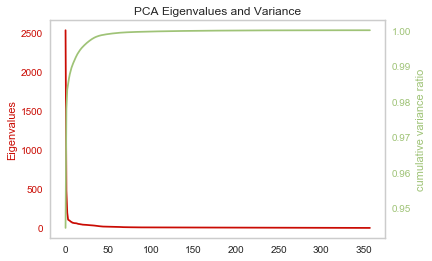

In [132]:
###PCA###


# Specify the features of interest and the target

# Create a list of colors to assign to points in the plot
colors = np.array(['r' if yi else 'b' for yi in y_train_list])

visualizer = PCADecomposition(scale=True, color=colors)
visualizer.fit_transform(x_train_list, y_train_list)
visualizer.show()


pca = decomposition.PCA(n_components=3)
pca.fit(x_train_list)
x_train_pca = pca.transform(x_train_list)

print(x_train_pca)

for n in range(2, num_of_comp):
    pca = decomposition.PCA(n_components=n)
    pca.fit(x_train_list)
    x_train_pca = pca.transform(x_train_list)
    
    x_test_pca = pca.transform(x_test_list)
    regr = linear_model.LinearRegression()
    # Train the model using the training sets
    regr.fit(x_train_pca, y_train_list)

    # Make predictions using the testing set
    reg_y_pred = regr.predict(x_test_pca)
    print(n)
    print('Variance score: %.2f \n' % r2_score(y_test_list, reg_y_pred))
    #print(get_eigen_value(pca_t, x_test_list))
    ###printing eigan values ???
    print("eigenvalues", pca.singular_values_[len(pca.singular_values_) - 1])

###plots for eiganvalues and 
pca = decomposition.PCA().fit(x_train_list) 

cum_var = np.cumsum(pca.explained_variance_ratio_)

fig, ax2 = plt.subplots()
ax2.plot(list(range(len(pca.singular_values_))), pca.singular_values_, 'r')
ax2.tick_params('y', colors='r')
ax2.set_ylabel('Eigenvalues', color='r')
plt.grid(False)

ax1 = ax2.twinx()
ax1.plot(list(range(len(pca.explained_variance_ratio_))), cum_var, 'g')
ax1.tick_params('y', colors='g')
ax1.set_ylabel('cumulative variance ratio', color='g')
ax1.set_xlabel('principal components')
plt.grid(False)


plt.title("PCA Eigenvalues and Variance")
plt.show()
# The coefficients
###use a regression model to compare different numbers for PCA?


In [133]:
###ICA###

# ica = decomposition.FastICA(n_components=3)
# ica.fit(x_train_list)
# x_train_ica = ica.transform(x_train_list)

#print(x_train_pca)

for n in range(2, num_of_comp):
        
    ica = decomposition.FastICA(n_components=n, max_iter=200)
    ica.fit(x_train_list)
    x_train_ica = ica.transform(x_train_list)
        
    #pca_t = decomposition.FastICA(n_components=n, max_iter=10000)
    #pca_t.fit(x_train_list)
    x_test_ica = ica.transform(x_test_list)
    
    regr = linear_model.LinearRegression() #linear_model.LinearRegression()
    # Train the model using the training sets
    regr.fit(x_train_ica, y_train_list)

    # Make predictions using the testing set
    reg_y_pred = regr.predict(x_test_ica)
    print(n)
    print('Variance score: %.2f' % r2_score(y_test_list, reg_y_pred))
    
    #print(get_eigen_value(pca_t, x_test_list))
    ###printing eigan values ???
    
    df = pd.DataFrame(x_train_ica)
    df = df.kurt(axis=0)
    
    print("kurtosis", df.abs().mean())
    print("-"*50)



2
Variance score: 0.16
kurtosis 0.5251478291606144
--------------------------------------------------
3
Variance score: 0.27
kurtosis 0.751816566927471
--------------------------------------------------
4
Variance score: 0.28
kurtosis 0.9083990259593446
--------------------------------------------------
5
Variance score: 0.28
kurtosis 0.8787306992663224
--------------------------------------------------
6
Variance score: 0.28
kurtosis 1.0564281560640116
--------------------------------------------------
7
Variance score: 0.28
kurtosis 1.0880674491489524
--------------------------------------------------
8
Variance score: 0.28
kurtosis 1.1847675821936974
--------------------------------------------------
9
Variance score: 0.29
kurtosis 1.4482735921292904
--------------------------------------------------
10
Variance score: 0.29
kurtosis 1.483188669801367
--------------------------------------------------
11
Variance score: 0.29
kurtosis 1.5606626629852831
-------------------------------

/usr/local/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


16
Variance score: 0.33
kurtosis 2.7865673347446633
--------------------------------------------------
17
Variance score: 0.33
kurtosis 3.018953456925173
--------------------------------------------------
18
Variance score: 0.33
kurtosis 3.368723580577304
--------------------------------------------------
19
Variance score: 0.33
kurtosis 3.640991529596951
--------------------------------------------------
20
Variance score: 0.34
kurtosis 3.8167818780435327
--------------------------------------------------
21
Variance score: 0.34
kurtosis 4.004934582817261
--------------------------------------------------
22
Variance score: 0.34
kurtosis 4.413453698879163
--------------------------------------------------
23
Variance score: 0.34
kurtosis 4.888430275004776
--------------------------------------------------
24
Variance score: 0.35
kurtosis 5.33896609772935
--------------------------------------------------
25
Variance score: 0.35
kurtosis 5.886049927170319
------------------------------

97
Variance score: 0.43
kurtosis 212.44339856188506
--------------------------------------------------
98
Variance score: 0.43
kurtosis 210.20988158188322
--------------------------------------------------
99
Variance score: 0.43
kurtosis 227.7641885347619
--------------------------------------------------


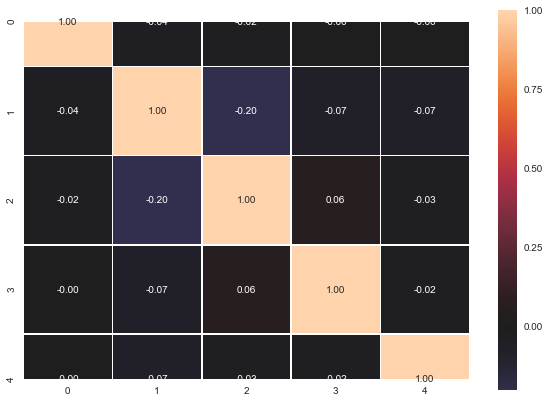

2 avg scores: -0.287271121742427
3 avg scores: -0.2662637033776254
4 avg scores: -0.12926208648775045
5 avg scores: -0.1288086889690857
6 avg scores: -0.21895922893026656
7 avg scores: -0.130546712790634
8 avg scores: -0.12193215993600318
9 avg scores: -0.16953889939580527
10 avg scores: -0.06903578275844531
11 avg scores: -0.10780127060428413
12 avg scores: -0.08059741948439722
13 avg scores: -0.11958960608956848
14 avg scores: -0.08089968449684042
15 avg scores: -0.05739857977938254
16 avg scores: -0.05868320608226609
17 avg scores: -0.05581168846405584
18 avg scores: -0.07205843288287714
19 avg scores: -0.06533303635601624
20 avg scores: -0.10712117432628698
21 avg scores: -0.08785177978303371
22 avg scores: -0.056113953476498966
23 avg scores: 0.02693335869226694
24 avg scores: -0.07168060161732318
25 avg scores: -0.06714662643067537
26 avg scores: -0.06767559020245091
27 avg scores: -0.03896041402034804
28 avg scores: -0.038658149007904874
29 avg scores: -0.12351905125132992
30 av

In [138]:
###Randomized Projections###

def run_rp(x, xtest):
    rp = random_projection.SparseRandomProjection(n_components=5)
    x_train_rp = rp.fit_transform(x)
    feature_corr(pd.DataFrame.from_records(x_train_rp))
    num_of_runs = 5
    
    for n in range(2, num_of_comp):
        runs = []
        rsum = 0
        for r in range(num_of_runs):
            rp = random_projection.SparseRandomProjection(n_components=n)
            rp.fit(x_train)
            x_train_rp = rp.transform(x_train)

            x_test_rp = rp.transform(xtest)

            regr = tree.DecisionTreeClassifier()
            # Train the model using the training sets
            regr.fit(x_train_rp, y_train)

            # Make predictions using the testing set
            reg_y_pred = regr.predict(x_test_rp)
            rsum = rsum + r2_score(y_test_list, reg_y_pred)
            runs.append(r2_score(y_test_list, reg_y_pred))
       
        #print('Variance scores:', ", ".join(map(str, runs)))
        print(n, 'avg scores:', rsum / len(runs))
        rsum = 0

run_rp(x_train, x_test)

In [ ]:
# def plot_clustering(X_red, labels, title=None):
#     x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
#     X_red = (X_red - x_min) / (x_max - x_min)

#     plt.figure(figsize=(6, 4))
#     for i in range(X_red.shape[0]):
#         plt.text(X_red[i, 0], X_red[i, 1], str(x_train_list[i]),
#                  color=plt.cm.nipy_spectral(labels[i] / 10.),
#                  fontdict={'weight': 'bold', 'size': 9})

#     plt.xticks([])
#     plt.yticks([])
#     if title is not None:
#         plt.title(title, size=17)
#     plt.axis('off')
#     plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
# for linkage in ('ward', 'average', 'complete', 'single'):
#     clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
#     t0 = time()
#     clustering.fit(x_train)
#     print("%s :\t%.2fs" % (linkage, time() - t0))

#     plot_clustering(x_train_list, clustering.labels_, "%s linkage" % linkage)

(34189, 54)
Feature ranking:
1. feature 355 (0.233271)
2. feature 357 (0.122746)
3. feature 24 (0.064506)
4. feature 356 (0.048508)
5. feature 37 (0.031563)
6. feature 13 (0.026702)
7. feature 19 (0.024217)
8. feature 27 (0.019685)
9. feature 25 (0.018585)
10. feature 29 (0.016383)
11. feature 149 (0.013438)
12. feature 36 (0.013320)
13. feature 35 (0.012305)
14. feature 135 (0.011208)
15. feature 132 (0.010642)
16. feature 308 (0.010266)
17. feature 17 (0.009643)
18. feature 160 (0.009194)
19. feature 298 (0.009156)
20. feature 4 (0.008903)
21. feature 28 (0.008360)
22. feature 6 (0.007960)
23. feature 210 (0.007358)
24. feature 211 (0.007170)
25. feature 5 (0.006687)
26. feature 215 (0.006682)
27. feature 21 (0.006363)
28. feature 318 (0.006334)
29. feature 34 (0.006154)
30. feature 159 (0.006098)
31. feature 12 (0.006029)
32. feature 303 (0.005601)
33. feature 2 (0.004979)
34. feature 1 (0.004882)
35. feature 14 (0.004782)
36. feature 32 (0.004600)
37. feature 118 (0.004523)
38. fea

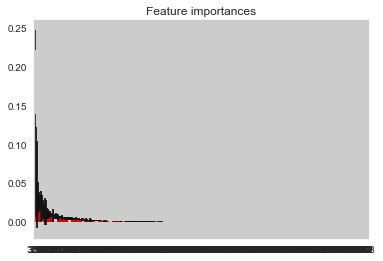

355
357
24
356
37
13
19
27
25
29
149
36
35
135
132
308
17
160
298
4
28
6
210
211
5
215
21
318
34
159
12
303
2
1
14
32
118
10
138
15
16
23
313
22
288
89
7
293
278
306
31
116
141
20
[355, 357, 24, 356, 37, 13, 19, 27, 25, 29, 149, 36, 35, 135, 132, 308, 17, 160, 298, 4, 28, 6, 210, 211, 5, 215, 21, 318, 34, 159, 12, 303, 2, 1, 14, 32, 118, 10, 138, 15, 16, 23, 313, 22, 288, 89, 7, 293, 278, 306, 31, 116, 141, 20]
        355   357  24   356  37   13   19   27   25   29   ...  288  89   7    \
0      21.0   8.0  0.0  2.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0   
1      22.0   8.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2       7.0   8.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3       9.0  12.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0   
4       0.0   6.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   
...     ...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
34184  49.0   8.0 

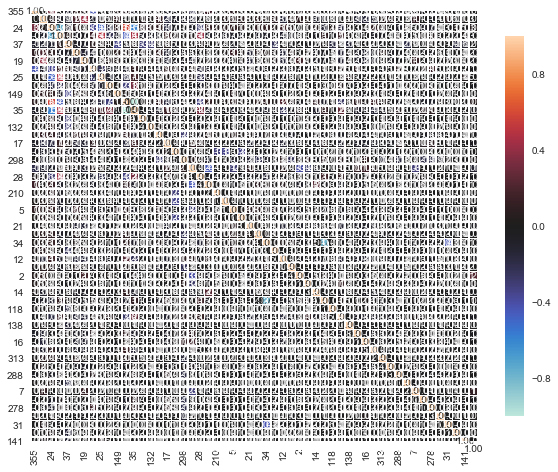

In [172]:
####EXTRA one, using trees####
#Feature importances with forests of trees

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(x_train, y_train)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(x_train)
print(X_new.shape)

amount_of_features = X_new.shape[1]

####EXTRA one, using trees####

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=random_state)

forest.fit(x_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, x_train.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()


FFI = []
for f in range(amount_of_features):
    FFI.append(x_train.columns[indices[f]])
    print(x_train.columns[indices[f]])


print(FFI)
x_train_ffi = x_train[FFI]
x_test_ffi = x_test[FFI]
print(x_train_ffi)
feature_corr(x_train_ffi)

In [165]:
####final feature reductions
##PCA = 25
##ICA = 78
##RP = 50
##TOP 56

pca = decomposition.PCA(n_components=25)
pca.fit(x_train_list)
x_train_pca = pca.transform(x_train_list)
x_test_pca = pca.transform(x_test_list)

ica = decomposition.FastICA(n_components=78)
ica.fit(x_train_list)
x_train_ica = ica.transform(x_train_list)
x_test_ica = ica.transform(x_test_list)

rp = random_projection.SparseRandomProjection(n_components=50)
rp.fit(x_train)
x_train_rp = rp.transform(x_train)
x_test_rp = rp.transform(x_test)

# feature_corr(pd.DataFrame.from_records(x_train_pca))
# feature_corr(pd.DataFrame.from_records(x_train_ica))
# feature_corr(pd.DataFrame.from_records(x_test_rp))
# feature_corr(pd.DataFrame.from_records(x_train_ffi))


34189
FFI ****************************************************************************************************
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++ 2	1.60s	2408895	0.043	0.034	0.038	0.066	0.038	0.532
k-means++ 3	1.91s	1351117	0.080	0.041	0.055	0.054	0.055	0.470
k-means++ 4	2.48s	940302	0.099	0.041	0.058	0.041	0.058	0.422
k-means++ 5	2.77s	748301	0.108	0.038	0.057	0.036	0.057	0.380
k-means++ 6	3.60s	636193	0.114	0.036	0.055	0.026	0.055	0.343
k-means++ 7	3.73s	561737	0.115	0.034	0.053	0.021	0.053	0.323
k-means++ 8	4.68s	514321	0.117	0.032	0.051	0.023	0.050	0.287
k-means++ 9	5.28s	481340	0.118	0.031	0.049	0.015	0.049	0.260
__________________________________________________________________________________


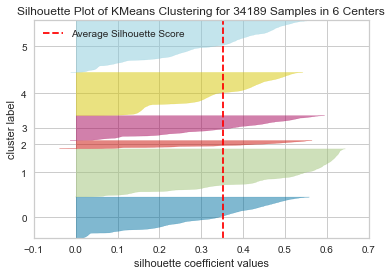

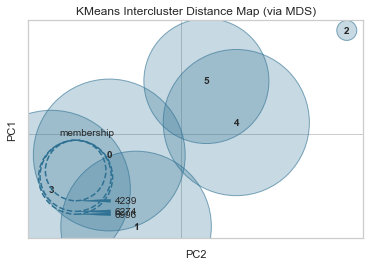

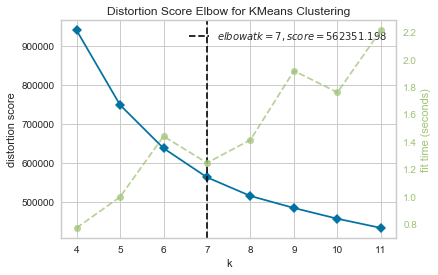

PCA ****************************************************************************************************
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++ 2	0.76s	2397647	0.043	0.034	0.038	0.066	0.038	0.534
k-means++ 3	1.22s	1339803	0.080	0.041	0.055	0.054	0.055	0.473
k-means++ 4	1.52s	928933	0.099	0.041	0.058	0.041	0.058	0.425
k-means++ 5	1.83s	736884	0.108	0.038	0.057	0.036	0.057	0.384
k-means++ 6	2.43s	623987	0.114	0.037	0.055	0.024	0.055	0.350
k-means++ 7	2.62s	550181	0.114	0.034	0.052	0.025	0.052	0.325
k-means++ 8	3.21s	503401	0.117	0.032	0.050	0.019	0.050	0.292
k-means++ 9	3.66s	469865	0.119	0.031	0.049	0.015	0.049	0.265
__________________________________________________________________________________


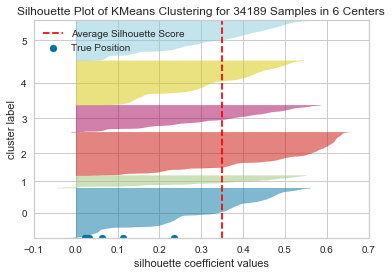

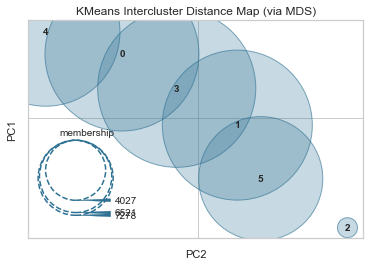

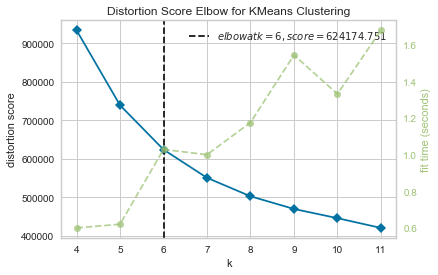

ICA ****************************************************************************************************
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++ 2	2.38s	77	0.009	0.036	0.015	-0.032	0.015	0.103
k-means++ 3	2.77s	76	0.006	0.023	0.010	0.020	0.010	0.099
k-means++ 4	3.13s	75	0.010	0.014	0.011	0.013	0.011	-0.006
k-means++ 5	3.47s	74	0.010	0.012	0.011	0.041	0.011	0.055
k-means++ 6	3.66s	73	0.052	0.051	0.051	0.138	0.051	0.030
k-means++ 7	4.17s	72	0.072	0.059	0.065	0.117	0.065	0.054
k-means++ 8	5.85s	71	0.043	0.016	0.023	-0.009	0.023	0.029
k-means++ 9	5.41s	70	0.081	0.044	0.057	0.059	0.057	0.039
__________________________________________________________________________________


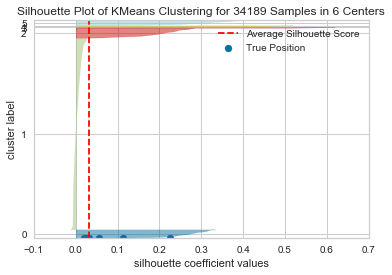

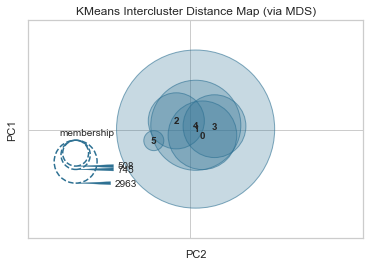

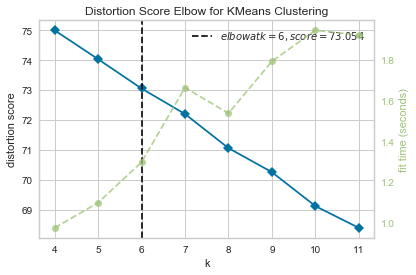

RP ****************************************************************************************************
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++ 2	1.40s	3388046	0.042	0.034	0.038	0.066	0.038	0.552
k-means++ 3	2.13s	1794836	0.080	0.041	0.055	0.055	0.055	0.500
k-means++ 4	3.11s	1176024	0.099	0.041	0.058	0.041	0.058	0.461
k-means++ 5	3.28s	888104	0.109	0.039	0.057	0.036	0.057	0.426
k-means++ 6	3.71s	719005	0.113	0.036	0.055	0.025	0.055	0.396
k-means++ 7	4.66s	608258	0.113	0.034	0.052	0.023	0.052	0.373
k-means++ 8	5.03s	536767	0.116	0.032	0.050	0.022	0.050	0.345
k-means++ 9	4.82s	489394	0.118	0.031	0.049	0.017	0.049	0.318
__________________________________________________________________________________


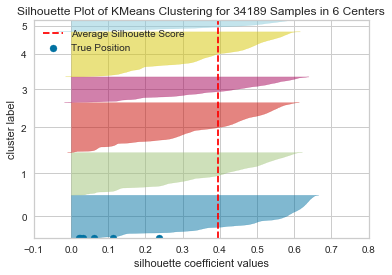

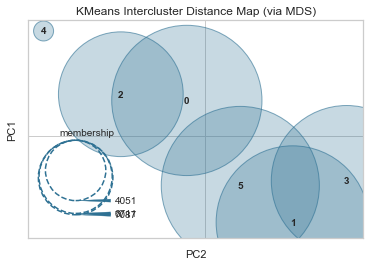

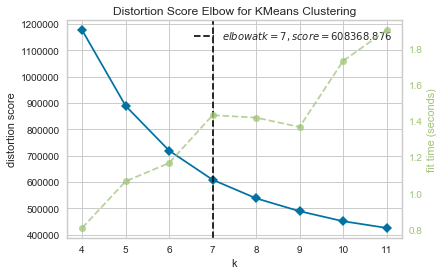

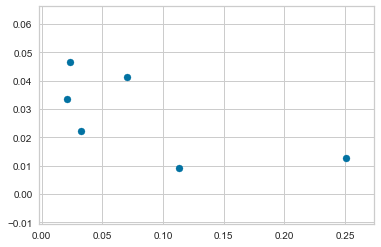

In [173]:
####RERUN kmeans PCA
print(len(x_train_ffi))
####RERUN kmeans PCA
print("FFI", "*"*100)
run_kmeans(6, x_train_ffi, y_train)
print("PCA", "*"*100)
run_kmeans(6, x_train_pca, y_train)
print("ICA", "*"*100)
run_kmeans(6, x_train_ica, y_train)
print("RP", "*"*100)
run_kmeans(6, x_train_rp, y_train)


In [163]:
pd.DataFrame.from_records(x_train_ica).shape

(34189, 78)

PCA ****************************************************************************************************
number of components:  1
aic 918200.4678692297
bic 921154.3486010904
******************************************************************************************
number of components:  2
aic 912423.3473392085
bic 915596.6592111501
******************************************************************************************
number of components:  3
aic 823706.3893275966
bic 827099.1323396193
******************************************************************************************
number of components:  4
aic 741188.0319257736
bic 744800.2060778774
******************************************************************************************
spherical
lower bound,  -48.301274127775095
converged,  True

diag
lower bound,  -11.099096544171804
converged,  True

tied
lower bound,  -11.900920898102088
converged,  True

full
lower bound,  -9.350108926194062
converged,  True



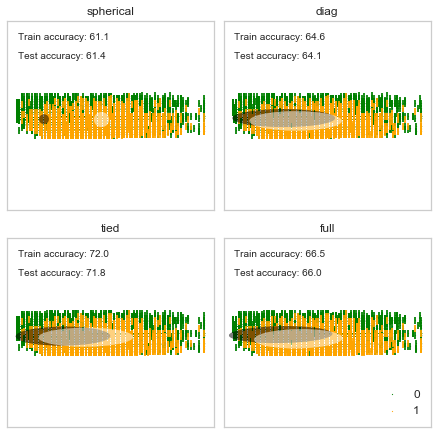

ICA ****************************************************************************************************
number of components:  1
aic -20264183.6309507
bic -20237522.74743085
******************************************************************************************
number of components:  2
aic -20290793.425382994
bic -20263465.808783665
******************************************************************************************
number of components:  3
aic -20464373.70014717
bic -20436379.350468367
******************************************************************************************
number of components:  4
aic -20606274.562865864
bic -20577613.480107583
******************************************************************************************
spherical
lower bound,  307.66871836681725
converged,  True

diag
lower bound,  336.2194973435462
converged,  True

tied
lower bound,  297.9404487024527
converged,  True

full
lower bound,  339.1444894211534
converged,  True



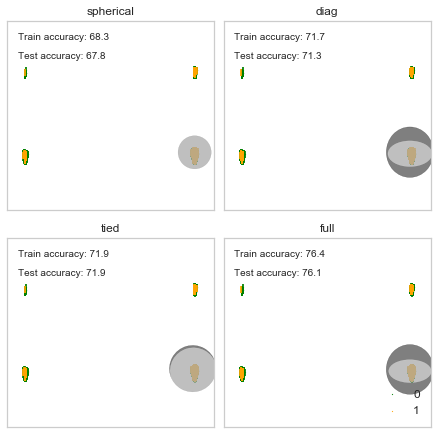

RP ****************************************************************************************************
number of components:  1
aic -1031266.5661342487
bic -1020084.017649348
******************************************************************************************
number of components:  2
aic -1036692.489914223
bic -1025079.518808394
******************************************************************************************
number of components:  3
aic -1099875.6876931489
bic -1087832.2939663916
******************************************************************************************
number of components:  4
aic -1144383.0871084584
bic -1131909.2707607727
******************************************************************************************
spherical
lower bound,  -87.12636881655555
converged,  True

diag
lower bound,  5.492787379892876
converged,  True

tied
lower bound,  16.203858287854132
converged,  True

full
lower bound,  70.5104114444361
converged,  True



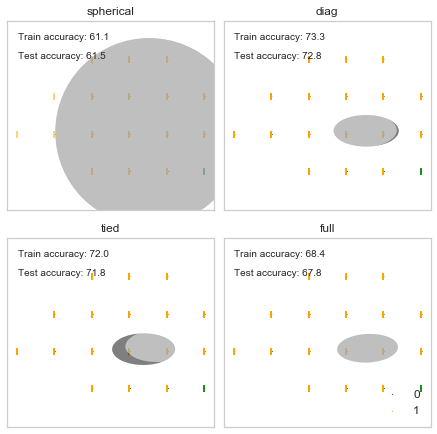

FFI ****************************************************************************************************
number of components:  1
aic -1377140.8351692043
bic -1364152.1996082517
******************************************************************************************
number of components:  2
aic -1490601.5279413688
bic -1477148.7111225522
******************************************************************************************
number of components:  3
aic -1465863.6767717965
bic -1451946.6786951162
******************************************************************************************
number of components:  4
aic -1846769.121603632
bic -1832387.942269088
******************************************************************************************
spherical
lower bound,  -82.9227707759438
converged,  True

diag
lower bound,  61.51309044391035
converged,  True

tied
lower bound,  21.363214965332674
converged,  True

full
lower bound,  80.64015248156107
converged,  True



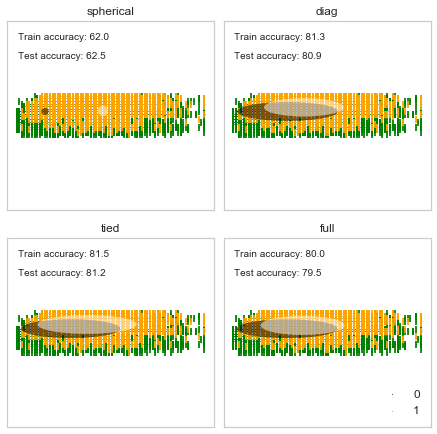

In [177]:
####RERUN ICA clusters 11
####RERUN EM
print("PCA", "*"*100)
run_em(pd.DataFrame.from_records(x_train_pca), y_train, pd.DataFrame.from_records(x_test_pca), y_test)
print("ICA", "*"*100)
run_em(pd.DataFrame.from_records(x_train_ica), y_train, pd.DataFrame.from_records(x_test_ica), y_test)
print("RP", "*"*100)
run_em(pd.DataFrame.from_records(x_train_rp), y_train, pd.DataFrame.from_records(x_test_rp), y_test)
print("FFI", "*"*100)
run_em(x_train_ffi, y_train, x_test_ffi, y_test)